In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
%matplotlib inline

house_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_data.csv')

In [8]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16613 entries, 0 to 16612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16613 non-null  float64
 1   bedrooms       16613 non-null  int64  
 2   bathrooms      16613 non-null  float64
 3   sqft_living    16613 non-null  int64  
 4   sqft_lot       16613 non-null  int64  
 5   floors         16613 non-null  float64
 6   waterfront     16613 non-null  int64  
 7   view           16613 non-null  int64  
 8   condition      16613 non-null  int64  
 9   grade          16613 non-null  int64  
 10  sqft_above     16613 non-null  int64  
 11  sqft_basement  16613 non-null  int64  
 12  yr_built       16613 non-null  int64  
 13  yr_renovated   16613 non-null  int64  
 14  zipcode        16613 non-null  int64  
 15  lat            16613 non-null  float64
 16  long           16613 non-null  float64
 17  sqft_living15  16613 non-null  int64  
 18  sqft_l

In [10]:
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.661300e+04,16613.000000,16613.000000,16613.000000,1.661300e+04,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000
mean,5.335161e+05,3.365918,2.062090,2053.860531,1.573761e+04,1.432553,0.007946,0.244026,3.449708,7.592608,1750.210859,303.649672,1967.297418,89.855234,98078.162283,47.560026,-122.215380,1974.793776,13287.334256
std,3.665165e+05,0.937185,0.758786,904.438391,4.195449e+04,0.509669,0.088786,0.781695,0.666582,1.168420,804.771068,450.701536,27.936716,413.846846,54.152178,0.139708,0.138657,673.022438,27456.421787
min,7.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,660.000000
25%,3.150000e+05,3.000000,1.500000,1414.000000,5.454000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98033.000000,47.464600,-122.327000,1490.000000,5421.000000
50%,4.470000e+05,3.000000,2.000000,1900.000000,7.902000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573000,-122.231000,1830.000000,7823.000000
75%,6.387000e+05,4.000000,2.500000,2500.000000,1.107000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2140.000000,600.000000,1990.000000,0.000000,98118.000000,47.679000,-122.127000,2330.000000,10327.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,871200.000000


In [11]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
col_name = house_data.drop('price', axis = 1).columns[:]
x = house_data.loc[:, col_name]
y = house_data['price']

# Normalizing x
x = pd.DataFrame(data = min_max_scaler.fit_transform(x), columns = col_name)

# Examine the normalized data
print(house_data.head())
x.head()

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.090909,0.12500,0.061503,0.003108,0.0,0.0,0.0,0.5,0.4,0.089602,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.164770,0.005732
1,0.090909,0.28125,0.167046,0.004072,0.4,0.0,0.0,0.5,0.4,0.199115,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.226055,0.008017
2,0.060606,0.12500,0.030372,0.005743,0.0,0.0,0.0,0.5,0.3,0.044248,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.406409,0.008503
3,0.121212,0.37500,0.120729,0.002714,0.0,0.0,0.0,1.0,0.4,0.075221,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.168272,0.004985
4,0.090909,0.25000,0.099468,0.004579,0.0,0.0,0.0,0.5,0.5,0.144912,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.245316,0.007861


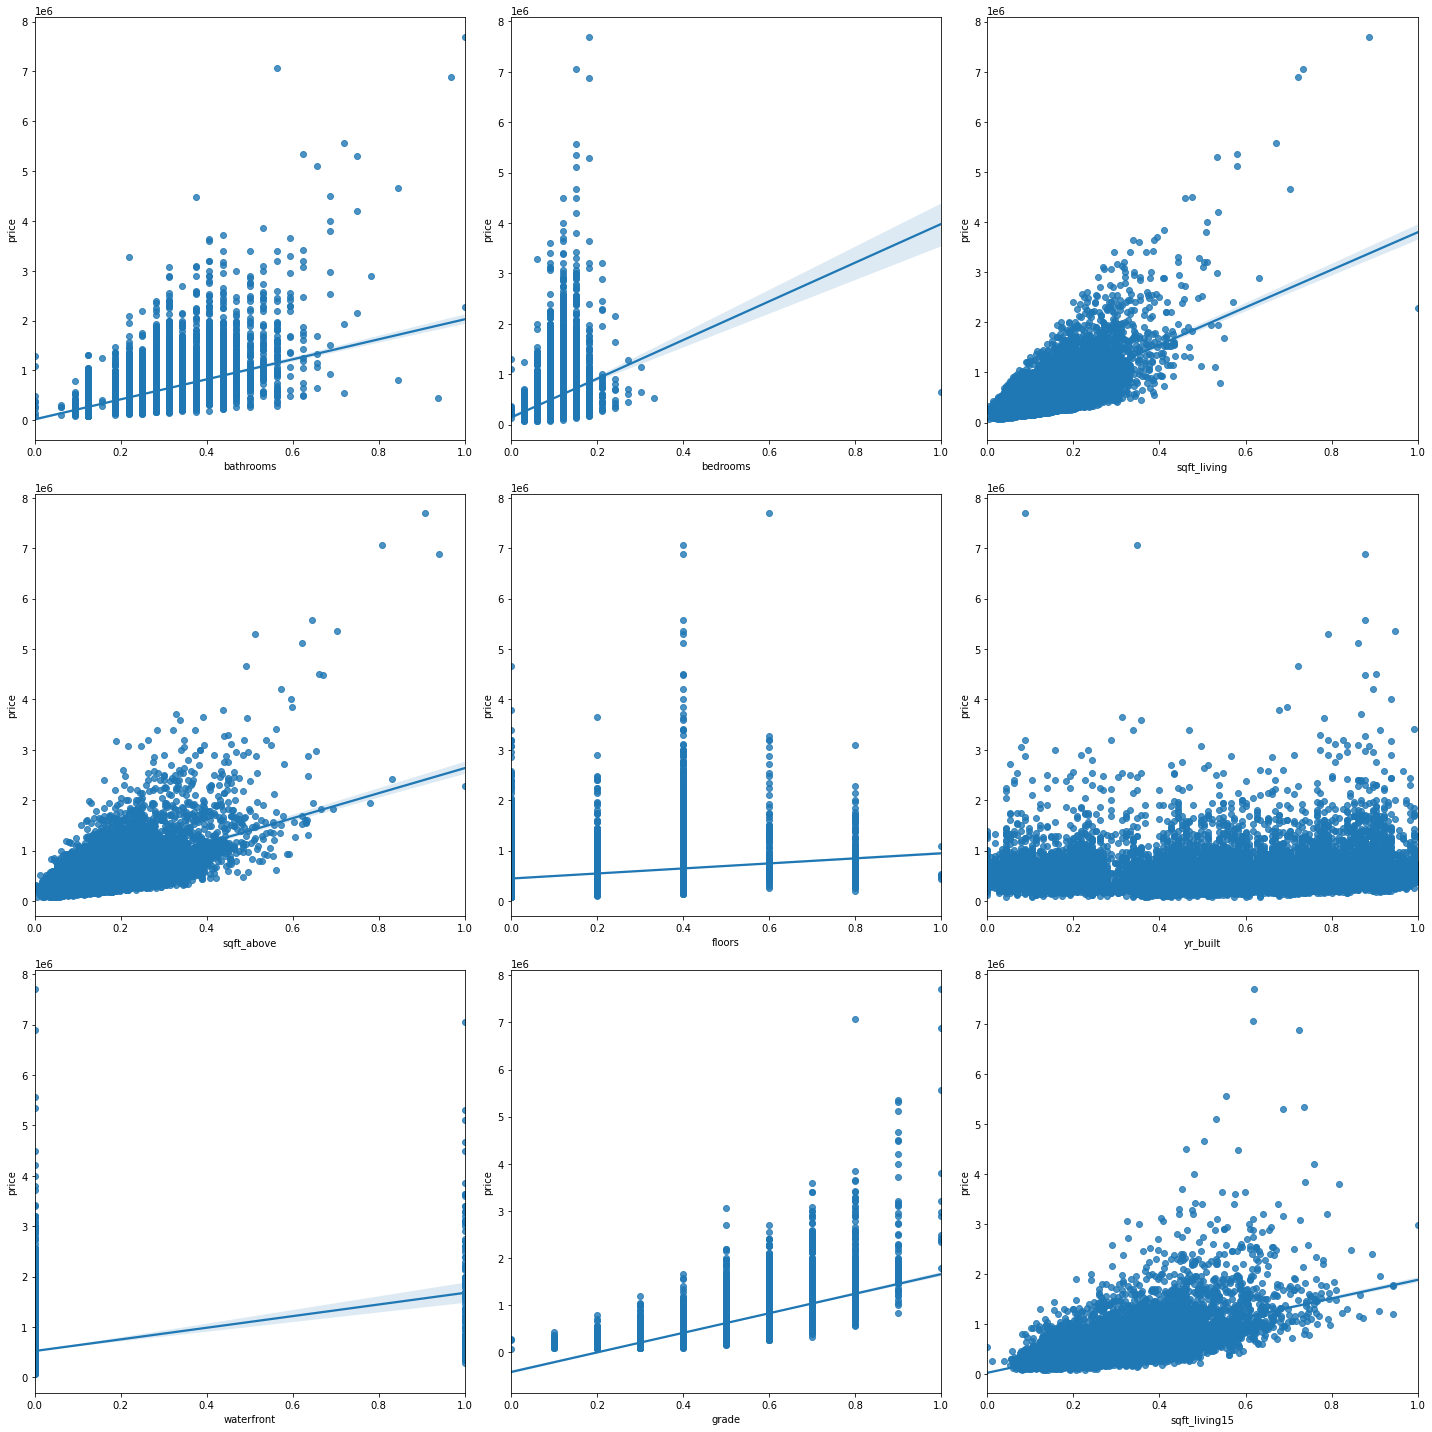

In [13]:
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (20, 20))
sns.regplot(y = house_data['price'], x = x['bathrooms'], ax = axs[0, 0])
sns.regplot(y = house_data['price'], x = x['bedrooms'], ax = axs[0, 1])
sns.regplot(y = house_data['price'], x = x['sqft_living'], ax = axs[0, 2])
sns.regplot(y = house_data['price'], x = x['sqft_above'], ax = axs[1, 0])
sns.regplot(y = house_data['price'], x = x['floors'], ax = axs[1, 1])
sns.regplot(y = house_data['price'], x = x['yr_built'], ax = axs[1, 2])
sns.regplot(y = house_data['price'], x = x['waterfront'], ax = axs[2, 0])
sns.regplot(y = house_data['price'], x = x['grade'], ax = axs[2, 1])
sns.regplot(y = house_data['price'], x = x['sqft_living15'], ax = axs[2, 2])
plt.tight_layout()

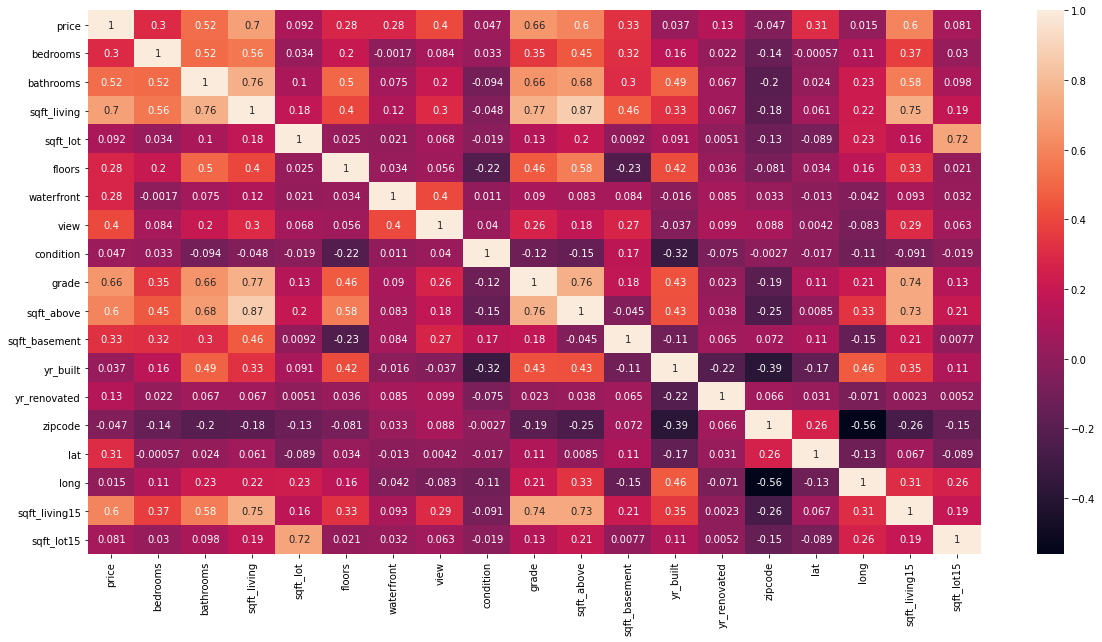

In [15]:
plt.figure(figsize = (20, 10))
sns.heatmap(house_data.corr(), annot = True)
plt.show()

In [162]:
features = x[['bedrooms','bathrooms','sqft_living','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','sqft_living15','sqft_lot15']]
target = y
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size = 0.2, random_state = 1)
print("Train features shape : ", train_features.shape)
print("Train target shape   : ", train_target.shape)
print("Test features shape  : ", test_features.shape)
print("Test target shape    : ", test_target.shape)

Train features shape :  (13290, 15)
Train target shape   :  (13290,)
Test features shape  :  (3323, 15)
Test target shape    :  (3323,)


In [163]:
model = LinearRegression(normalize = True)
model.fit(train_features, train_target)

LinearRegression(normalize=True)

In [164]:
print("Model intercept  : ", model.intercept_, "\n")
print("Model coefficient: ", model.coef_, "\n")

for i in range(len(features.columns)):
    print(features.columns[i], ": ", model.coef_[i])

Model intercept  :  -413712.53107599705 

Model coefficient:  [ 0.00000000e+00  2.52009361e+05 -2.25364017e+18 -1.01048192e+04
  5.80343493e+05  2.06256863e+05  1.18027927e+05  9.89108174e+05
  1.54691778e+18  8.24794658e+17 -3.25087833e+05  4.27265410e+04
  3.43234029e+05  2.35692919e+05 -2.14344283e+05] 

bedrooms :  0.0
bathrooms :  252009.3605954189
sqft_living :  -2.25364017443256e+18
floors :  -10104.819246992904
waterfront :  580343.4932046224
view :  206256.86294071047
condition :  118027.92743346981
grade :  989108.1736770326
sqft_above :  1.5469177810849147e+18
sqft_basement :  8.247946576136888e+17
yr_built :  -325087.8325438079
yr_renovated :  42726.541037804775
lat :  343234.0292343773
sqft_living15 :  235692.91895321143
sqft_lot15 :  -214344.28332718305


In [165]:
# Model evaluation for training set
train_target_pred = model.predict(train_features)
rmse = (np.sqrt(mean_squared_error(train_target, train_target_pred)))
r2 = r2_score(train_target, train_target_pred)

# Examine the first 10 predicted output from the model
output = pd.DataFrame(train_target[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Model evaluation for testing set
test_target_pred = model.predict(test_features)
rmse = (np.sqrt(mean_squared_error(test_target, test_target_pred)))
r2 = r2_score(test_target, test_target_pred)

output = pd.DataFrame(test_target[0:10])
output['Predicted'] = test_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

           price      Predicted     Difference
4834    430000.0  426619.890143   -3380.109857
4567    599000.0  512305.746366  -86694.253634
12309   270000.0  395347.404597  125347.404597
2128    235000.0  178469.017421  -56530.982579
924     451000.0  552123.995271  101123.995271
15795   315000.0  465565.847103  150565.847103
3050    517000.0  407634.589734 -109365.410266
9541    825000.0  804526.229131  -20473.770869
44      309000.0  159321.519932 -149678.480068
11874  1400000.0  843449.445834 -556550.554166 

Model training performance:
---------------------------
RMSE is 201268.05088072835
R2 score is 0.6880744750642263


          price      Predicted     Difference
16050  399000.0  445863.322839   46863.322839
7202   500000.0  805414.608823  305414.608823
321    520000.0  507938.185726  -12061.814274
11958  315000.0  325506.622366   10506.622366
11418  474000.0  572503.812049   98503.812049
5363   307000.0  389794.317658   82794.317658
13873  390000.0  570406.534821  180406.5348

In [166]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_new_test_data.csv')

In [167]:
test_new.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5,3.25,5210,35765,2.5,0,4,5,10,4940,270,1911,0,98136,47.5463,-122.397,2590,10250
1,5,2.00,2800,17788,1.0,0,0,4,8,1400,1400,1963,0,98033,47.6719,-122.163,1760,18282
2,4,2.25,2060,44431,2.0,0,0,3,7,2060,0,1988,0,98077,47.7440,-122.046,2160,45657
3,5,2.00,2360,19899,1.0,0,0,4,7,2360,0,1968,0,98010,47.3299,-122.046,1860,19998
4,4,2.50,2370,6557,2.0,0,0,3,9,2370,0,1998,0,98042,47.4230,-122.155,2370,7378


In [175]:
new_feat=test_new[['bedrooms','bathrooms','sqft_living','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','sqft_living15','sqft_lot15']]
price = model.predict(new_feat)

In [178]:
res = pd.DataFrame(price)
res.index = test_new.index # its important for comparison
res.columns = ["price"]
res.to_csv("prediction_results_HP.csv")   

ValueError: DataFrame constructor not properly called!